In [1]:
#Testing Support Vector Machine (SVM)
#Testing on the one and only Iris Dataset

In [2]:
#Loading libraries
#Pandas for dataframes and SKLearn for SVM and Iris Dataset

import pandas as pd
from sklearn.datasets import load_iris

In [3]:
#loading Iris Dataset
iris = load_iris()

In [4]:
#Looking into the dataset content using the "dir" function
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
#Looking into the features identified in the dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
#Creating a general DataFrame to link the dataset in. For now just importing the features as columns
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
#Adding the "target" column from the Iris dataset which shows the class of each item in numerical format
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#We can even look at the data from just a specific class
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [9]:
#Now let's look at the actual class names that are included under "target_names"
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
#Let's assign these class names to the dataframe to their corresponding targets
#So for instance, wherever we have target = 1, the class name should be 'versicolor'
#For this purpose, we use the one and only Lambda function along with "apply" to iterate and assign
df['flower_name'] = df.target.apply (lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [11]:
#Now let's start visualizing the dataset for each class using Matplotlib library
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
#First let's slice the dataset into the three classes it's consist of
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [13]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


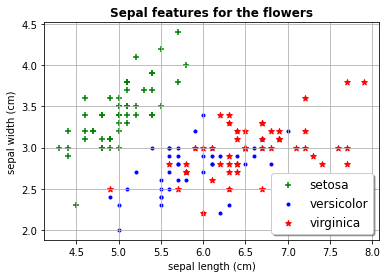

In [40]:
#Plotting the datasets and their "sepal length and width" features
fig, ax = plt.subplots()
plt.xlabel ('sepal length (cm)')
plt.ylabel ('sepal width (cm)')
ax.scatter (df0['sepal length (cm)'], df0['sepal width (cm)'], label = 'setosa', color = 'green', marker = '+')
ax.scatter (df1['sepal length (cm)'], df1['sepal width (cm)'], label = 'versicolor', color = 'blue', marker = '.')
ax.scatter (df2['sepal length (cm)'], df2['sepal width (cm)'], label = 'virginica', color = 'red', marker = '*')
ax.legend(loc='best', shadow=True, fontsize='large')
ax.set_title ("Sepal features for the flowers", fontweight ="bold")
ax.grid(True)
plt.show()

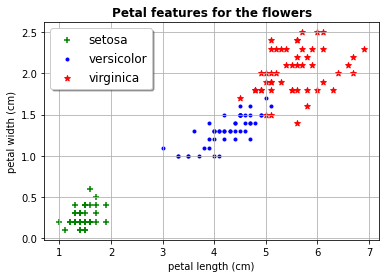

In [39]:
#Plotting the datasets and their "petal length and width" features
fig, ax = plt.subplots()
plt.xlabel ('petal length (cm)')
plt.ylabel ('petal width (cm)')
ax.scatter (df0['petal length (cm)'], df0['petal width (cm)'], label = 'setosa', color = 'green', marker = '+')
ax.scatter (df1['petal length (cm)'], df1['petal width (cm)'], label = 'versicolor', color = 'blue', marker = '.')
ax.scatter (df2['petal length (cm)'], df2['petal width (cm)'], label = 'virginica', color = 'red', marker = '*')
ax.legend(loc='best', shadow=True, fontsize='large')
ax.set_title ("Petal features for the flowers", fontweight ="bold")
ax.grid(True)
plt.show()

In [16]:
#Now we start to prepare our data for train and test datasets
from sklearn.model_selection import train_test_split

In [17]:
#Dropping the class number and name columns so we could move them to another dataframe
X_data = df.drop(['target', 'flower_name'], axis = 'columns')
X_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [18]:
Y_data = df.target
Y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.25)

In [20]:
len(X_train)

112

In [22]:
from sklearn.svm import SVC
model = SVC()
"""  
Here are all the hyperparameters that could be adjusted

    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
"""

"  \nHere are all the hyperparameters that could be adjusted\n\n    C=1.0,\n    kernel='rbf',\n    degree=3,\n    gamma='scale',\n    coef0=0.0,\n    shrinking=True,\n    probability=False,\n    tol=0.001,\n    cache_size=200,\n    class_weight=None,\n    verbose=False,\n    max_iter=-1,\n    decision_function_shape='ovr',\n    break_ties=False,\n    random_state=None,\n"

In [23]:
model.fit (X_train, Y_train)

SVC()

In [24]:
model.score (X_test, Y_test)

0.9736842105263158

In [37]:
#Let's look at the Confusion Matrix for evaluating the classification 
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
confusion_matrix(Y_test, Y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

Confusion matrix, without normalization
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Normalized confusion matrix
[[1.     0.     0.    ]
 [0.     0.9375 0.0625]
 [0.     0.     1.    ]]


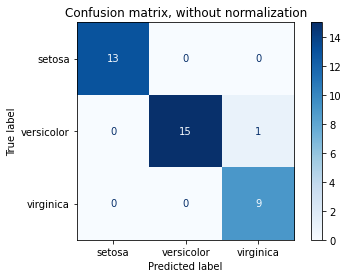

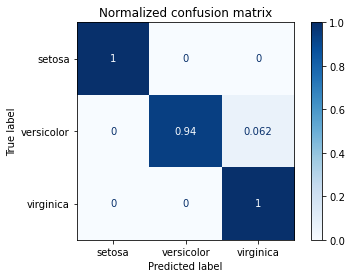

In [42]:
#Now let's get a nice looking Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
class_names = iris.target_names

# Plot confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, Y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Now at this stage, let's try to plot the decision function. For this purpose, we will only focus on the Sepal Length and Sepal Width features and use Support Vectors with different Kernels to compare.

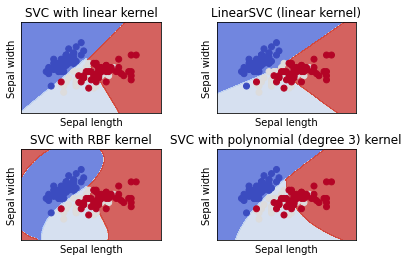

In [56]:
from sklearn import svm
import numpy as np

# we only take the first two features (Sepal Length and width)                      
X = iris.data[:, :2]
y = iris.target



h = .02  # step size in the mesh

# we create an instance of SVM and fit our data. We do not scale our
# data since we want to plot the support vectors

C = 1.0  # SVM regularization parameter
#Note the max_iter parameter is something that we found needed to be above 1000 to not getting warning
svc = svm.SVC(kernel='linear', C=C, max_iter=10000).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C, max_iter=10000).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C, max_iter=10000).fit(X, y)
lin_svc = svm.LinearSVC(C=C, max_iter=10000).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()
